In [1]:
#| code-fold: true
#| code-summary: "Import Statements"

import glob
import logging
import time
from shutil import copyfile

import matplotlib.pyplot as plt
# import networkx as nx
import torch.nn as nn
import torch_geometric.data as dataridlines
import umap
from prettytable import PrettyTable
from scipy.optimize import curve_fit
from scipy.spatial import Delaunay
from torch_geometric.loader import DataLoader
from torch_geometric.utils.convert import to_networkx
from tqdm import trange
import os
import scipy.io
from sklearn import metrics
from matplotlib import rc
import matplotlib
import networkx as nx

from ParticleGraph.config import ParticleGraphConfig
from ParticleGraph.generators.graph_data_generator import *

from ParticleGraph.models.utils import *
from ParticleGraph.models.Ghost_Particles import Ghost_Particles

from ParticleGraph.data_loaders import *
from ParticleGraph.utils import *
from ParticleGraph.fitting_models import linear_model
from ParticleGraph.embedding_cluster import *
from ParticleGraph.models import Division_Predictor
from GNN_particles_Ntype import *

/home/prasannak@hhmi.org/micromamba/envs/particle-graph/lib/python3.11/site-packages/juliacall/__init__.py:60: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## Data Generation

In [2]:
if __name__ == '__main__':


    config_list = ['arbitrary_3']

    for config_file in config_list:
        # Load parameters from config file
        config = ParticleGraphConfig.from_yaml(f'./config/{config_file}.yaml')
        # print(config.pretty())

        device = set_device(config.training.device)
        print(f'device {device}')

        data_generate(config, device=device, visualize=True, run_vizualized=0, style='color', alpha=1, erase=True, bSave=True, step=config.simulation.n_frames // 25)
        #data_train(config, device=device)
        #data_test(config, visualize=True, verbose=False, best_model=8, run=0, step=config.simulation.n_frames // 25, test_simulation=False, device=device)

device cpu

Generating data ... PDE_A 


100%|█████████████████████████████████████████| 251/251 [01:49<00:00,  2.29it/s]


## Visualization

In [3]:
#| code-fold: true
#| code-summary: "Import Statements"

import PIL
from PIL import Image
from matplotlib.pyplot import figure, imshow, axis

In [4]:
#| code-fold: true
#| code-summary: "Values"

n_frames = config.simulation.n_frames
step = n_frames // 25

t_step = config.simulation.delta_t

In [5]:
#| code-fold: true
#| code-summary: "Importing Images"

imgs = [np.array(Image.open(f'graphs_data/graphs_{config_list[0]}/generated_data/Fig_0_{num}.tif')) for num in range(0, n_frames, step)]

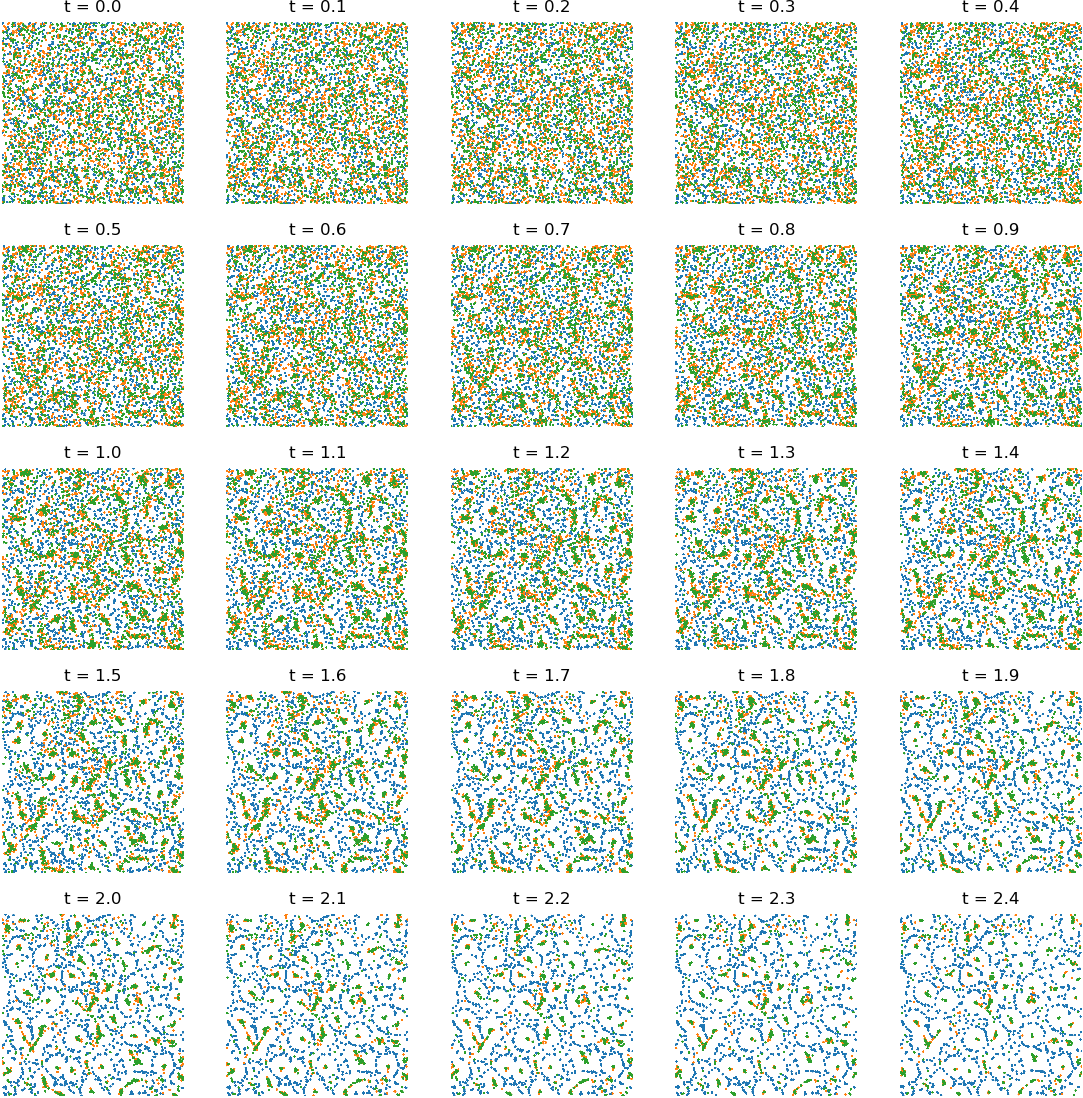

In [6]:
#| code-fold: true
#| code-summary: "Visualizing Data"

size = 14
length = 5
num_files = 25

def imgMatrix(imgs, size, length):
    fig = figure(figsize=(size, size))
    
    for i in range(num_files):
        a = fig.add_subplot(length, length, i+1)
        imshow(imgs[i], interpolation="nearest")
        plt.title(f't = {round(t_step*i, 6)}')
        axis("off")

imgMatrix(imgs, size, length)